Done. You have the matrices PP QQ  RR  SS  WW.
  
Done.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
These are the UNFILTERED SIMULATION results.
  
  
You have the matrices "Response" and "Response_named"
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
These are expressd as %-deviations from steady state.
  
If you want, you can download these into an excel file
or use them to make plots.
  
 
 
You have the matrices "SS_level_Response" and "SS_level_Response_named" 
  
These variables are levels, which are calculated from given steady
values and simulated values for %-deviations from steady state.
  
 
 
You have the matrices "SS_ln_Response" and "SS_ln_Response_named" 
 
These are the equivalent natural log levels.
 
NOTE:  Some levels for certain variable are negative
due to their variability, i.e. large %-deviations from steady state
and the log of negative numbers is undefined.
  
  
Trend and c

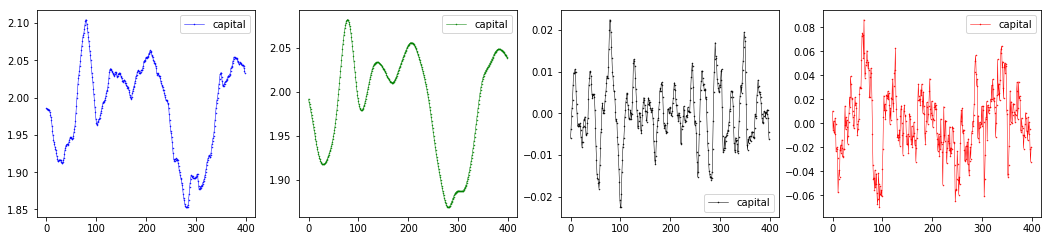

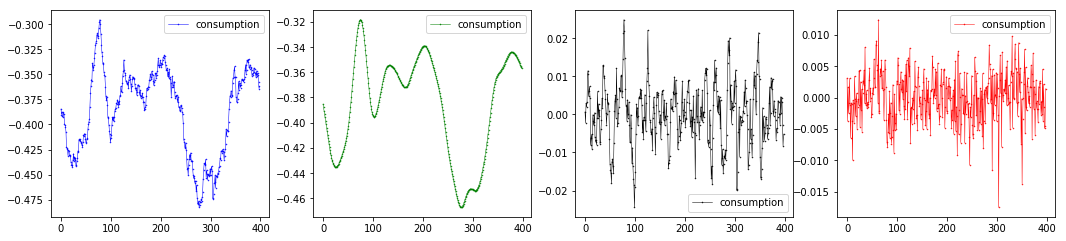

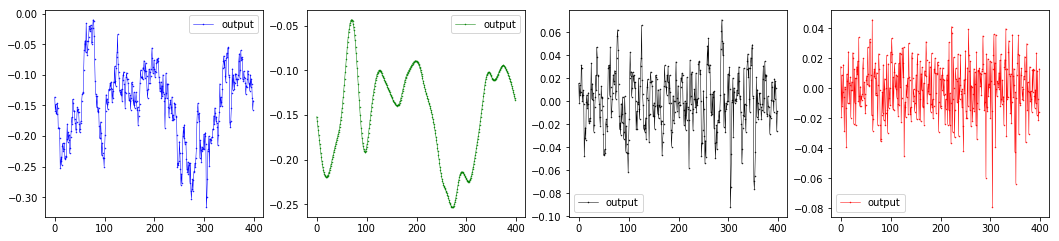

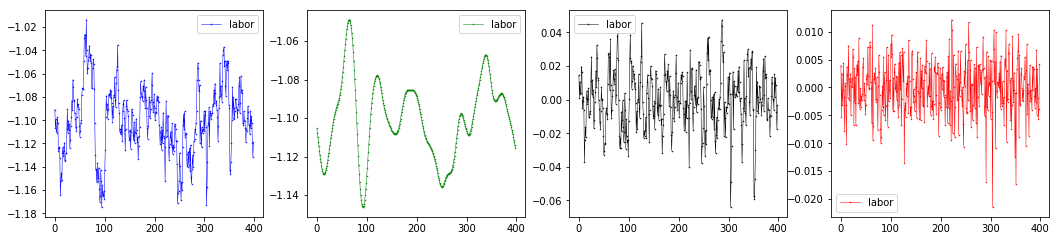

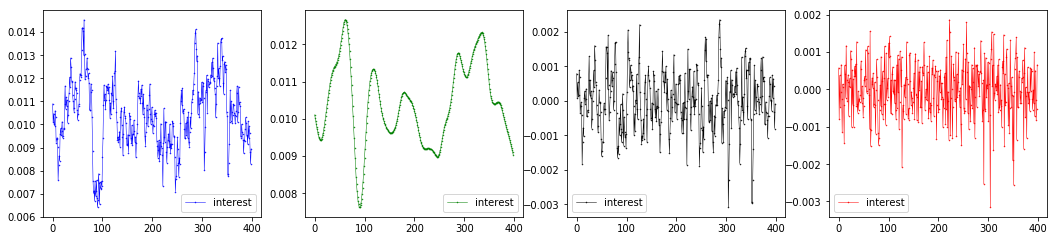

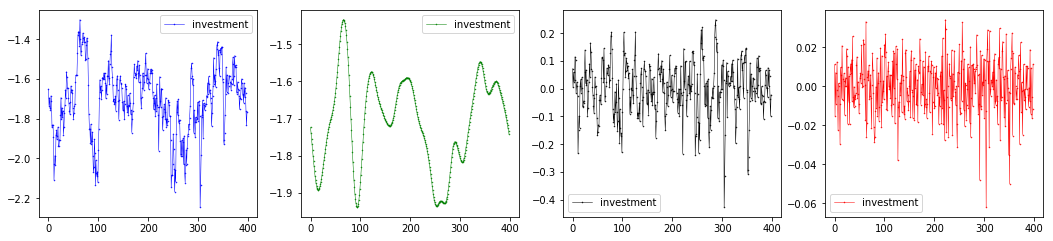

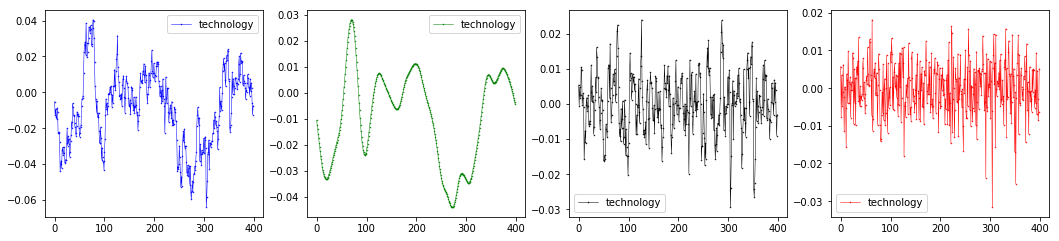

  
  
Shocks used in simulation
  


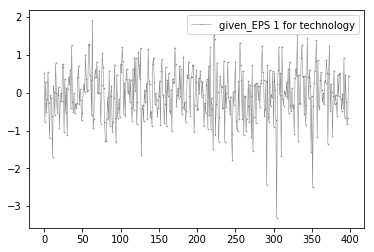

   
   
 
START:   Moments for Cyclical Ln Levels
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Cyclical Ln Levels
 


,Mean,Std Deviation,Coeff of Variation
capital,2.584454e-05,7.368954e-03,2.851261e+02
consumption,1.641782e-05,7.866553e-03,4.791472e+02
output,1.543648e-05,2.463360e-02,1.595804e+03
labor,-1.145695e-06,1.728452e-02,-1.508649e+04
interest,-3.402152e-07,8.470987e-04,-2.489891e+03
investment,9.422843e-06,9.411702e-02,9.988176e+03
technology,5.138932e-06,8.469480e-03,1.648101e+03


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Cyclical Ln Levels
 


,Correlation with GDP,Std Dev Relative to GDP
capital,3.628876e-01,2.991425e-01
consumption,8.996394e-01,3.193425e-01
output,1.000000e+00,1.000000e+00
labor,9.798896e-01,7.016644e-01
interest,9.547801e-01,3.438794e-02
investment,9.850357e-01,3.820677e+00
technology,9.991549e-01,3.438182e-01


 
 
  
Table 03:  Autocorrelations  for Cyclical Ln Levels
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,consumption,output,labor,interest,investment,technology
6,2.191966e-01,1.261595e-02,-1.064092e-01,-1.206772e-01,-1.190836e-01,-1.134583e-01,-1.059591e-01
5,3.640612e-01,6.783707e-02,-1.008944e-01,-1.214100e-01,-1.184317e-01,-1.179853e-01,-1.003535e-01
4,5.219307e-01,1.720095e-01,-2.619225e-02,-5.345418e-02,-5.009022e-02,-4.803895e-02,-2.769432e-02
3,6.848880e-01,3.522855e-01,1.630985e-01,1.374142e-01,1.414425e-01,1.356297e-01,1.624875e-01
2,8.346698e-01,5.537615e-01,3.932613e-01,3.701960e-01,3.740175e-01,3.643765e-01,3.923568e-01
1,9.489086e-01,7.653795e-01,6.596654e-01,6.457609e-01,6.476909e-01,6.409592e-01,6.599638e-01
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,9.489086e-01,7.653795e-01,6.596654e-01,6.457609e-01,6.476909e-01,6.409592e-01,6.599638e-01
-2,8.346698e-01,5.537615e-01,3.932613e-01,3.701960e-01,3.740175e-01,3.643765e-01,3.923568e-01
-3,6.848880e-01,3.522855e-01,1.630985e-01,1.374142e-01,1.414425e-01,1.356297e-01,1.624875e-01


 
 
  
Table 04:  Cross Correlations with Output  for Cyclical Ln Levels
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,consumption,output,labor,interest,investment,technology
6,4.468733e-01,1.314995e-01,-1.064092e-01,-2.040819e-01,-2.511391e-01,-1.765142e-01,-1.071252e-01
5,5.142625e-01,1.669263e-01,-1.008944e-01,-2.120970e-01,-2.660911e-01,-1.809625e-01,-1.018614e-01
4,5.833498e-01,2.535087e-01,-2.619225e-02,-1.488887e-01,-2.092364e-01,-1.132228e-01,-2.838566e-02
3,6.332819e-01,4.153347e-01,1.630985e-01,4.072164e-02,-2.211040e-02,7.275110e-02,1.611785e-01
2,6.259217e-01,5.803276e-01,3.932613e-01,2.846045e-01,2.257919e-01,3.094514e-01,3.914645e-01
1,5.424391e-01,7.356492e-01,6.596654e-01,5.840108e-01,5.368140e-01,6.003548e-01,6.587809e-01
0,3.628876e-01,8.996394e-01,1.000000e+00,9.798896e-01,9.547801e-01,9.850357e-01,9.991549e-01
-1,5.907480e-02,5.093425e-01,6.596654e-01,6.837275e-01,6.853803e-01,6.768849e-01,6.598004e-01
-2,-1.564738e-01,2.146345e-01,3.932613e-01,4.459827e-01,4.667659e-01,4.304453e-01,3.936009e-01
-3,-2.982037e-01,-1.948240e-02,1.630985e-01,2.329626e-01,2.651704e-01,2.129501e-01,1.642034e-01


 
 
END:   Moments for Cyclical Ln Levels
 
 
START:   Moments for Ln First Differences
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Ln First Differences
 


,Mean,Std Deviation,Coeff of Variation
capital,9.064365e-04,2.781088e-02,3.068156e+01
consumption,4.654876e-05,3.952047e-03,8.490123e+01
output,2.320347e-05,1.774172e-02,7.646148e+02
labor,-1.354325e-05,4.907123e-03,-3.623299e+02
interest,-3.501520e-06,7.300765e-04,-2.085027e+02
investment,-2.334528e-05,1.402696e-02,-6.008478e+02
technology,8.781222e-06,7.061604e-03,8.041710e+02


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Ln First Differences
 


,Correlation with GDP,Std Dev Relative to GDP
capital,3.827834e-01,1.567542e+00
consumption,9.529310e-01,2.227544e-01
output,1.000000e+00,1.000000e+00
labor,9.931507e-01,2.765867e-01
interest,9.845449e-01,4.115027e-02
investment,9.963449e-01,7.906202e-01
technology,9.999983e-01,3.980225e-01


 
 
  
Table 03:  Autocorrelations  for Ln First Differences
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,consumption,output,labor,interest,investment,technology
6,4.694060e-01,9.782826e-02,1.646770e-02,7.906764e-03,8.699853e-03,8.893500e-03,1.622882e-02
5,5.053174e-01,3.808186e-02,-6.482942e-02,-7.584672e-02,-7.497403e-02,-7.453817e-02,-6.513378e-02
4,5.604469e-01,-9.683587e-03,-1.348464e-01,-1.481182e-01,-1.469687e-01,-1.465676e-01,-1.352150e-01
3,6.545477e-01,1.032425e-01,-1.795266e-02,-3.085515e-02,-2.977750e-02,-2.933724e-02,-1.831025e-02
2,7.577718e-01,1.261164e-01,-1.330825e-02,-2.832717e-02,-2.720889e-02,-2.652468e-02,-1.372170e-02
1,8.692379e-01,1.089595e-01,-5.921321e-02,-7.743934e-02,-7.616682e-02,-7.522981e-02,-5.971320e-02
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,8.692379e-01,1.089595e-01,-5.921321e-02,-7.743934e-02,-7.616682e-02,-7.522981e-02,-5.971320e-02
-2,7.577718e-01,1.261164e-01,-1.330825e-02,-2.832717e-02,-2.720889e-02,-2.652468e-02,-1.372170e-02
-3,6.545477e-01,1.032425e-01,-1.795266e-02,-3.085515e-02,-2.977750e-02,-2.933724e-02,-1.831025e-02


 
 
  
Table 04:  Cross Correlations with Output  for Ln First Differences
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,consumption,output,labor,interest,investment,technology
6,1.339466e-01,5.758274e-02,1.646770e-02,2.115011e-04,-7.984126e-03,4.605107e-03,1.621181e-02
5,1.368914e-01,-8.708588e-03,-6.482942e-02,-8.483698e-02,-9.448233e-02,-7.954457e-02,-6.515345e-02
4,1.803156e-01,-5.238313e-02,-1.348464e-01,-1.632560e-01,-1.767298e-01,-1.557989e-01,-1.353110e-01
3,2.663053e-01,7.254427e-02,-1.795266e-02,-5.237927e-02,-6.946149e-02,-4.314615e-02,-1.850021e-02
2,2.977310e-01,8.669999e-02,-1.330825e-02,-5.151635e-02,-7.050923e-02,-4.126009e-02,-1.391525e-02
1,3.284208e-01,5.879426e-02,-5.921321e-02,-1.032107e-01,-1.248537e-01,-9.145971e-02,-5.991687e-02
0,3.827834e-01,9.529310e-01,1.000000e+00,9.931507e-01,9.845449e-01,9.963449e-01,9.999983e-01
-1,-1.226540e-01,-8.924043e-02,-5.921321e-02,-4.616183e-02,-3.934329e-02,-4.975146e-02,-5.901269e-02
-2,-1.002768e-01,-4.391909e-02,-1.330825e-02,-1.179059e-03,4.941221e-03,-4.458629e-03,-1.311744e-02
-3,-1.004432e-01,-4.781606e-02,-1.795266e-02,-5.995443e-03,6.313287e-05,-9.235048e-03,-1.776506e-02


 
 
END:   Moments for Ln First Differences
 


In [2]:
#   Uhlig's Exampl05.m  Model 2
#   This is  "Economy 2" from Farmer, R.E.A. 
#   and J.T. Guo, "Real Business Cycles and the 
#   Animal Spirits Hypothesis," Journal of Economic 
#  Theory 63, 42-72 (1994).

#  Exampl05  is set-up correctly compared to
#  Exampl04.  Uhlig introduced an additional
#  state variable  c(t)

###  NOTE NOTE
### Py and MAT results match for Models 1 and 2,
### but not model 3
###  differences in eigenvalues matter in Model 3


import numpy as np


#  These are the parameters for  
#  Farmer-Guo Model 2  

lamb = 0.7
b = 0.63
a = 0.3                
psi =1.0/1.05 
sigma_sigma = 0.70

L_bar = 1.0/3
Z_bar = 1
delta = 0.025
rho = 0.99
eta = 1.0


alpha   = a/lamb
betta   = b/lamb  
R_bar = 1.0/rho
YK_bar = (R_bar + delta - 1)/a
K_bar = (YK_bar / (Z_bar*L_bar**betta) )**(1.0/(alpha-1))
I_bar = delta * K_bar
Y_bar = YK_bar * K_bar
C_bar = Y_bar - delta*K_bar
A_bar = C_bar**(-eta) * b * Y_bar/L_bar # Parameter in utility function
     
        

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']

SteadyState = [[K_bar],
                         [C_bar],
                         [Y_bar],
                         [L_bar],
                         [R_bar],
                         [I_bar],
                         [1]]

AA = np.vstack(([0, -C_bar],
                          [- K_bar, 0],
                          [0, 0],
                          [0, -eta],
                          [0, 0]))

BB = np.vstack(([0, 0],
                          [(1-delta)*K_bar, 0],
                          [alpha, 0],
                          [0, 0],
                          [-a*YK_bar, 0]))

CC = np.vstack(([Y_bar, 0, 0, -I_bar],
                           [0, 0, 0, I_bar],
                           [-1, betta, 0, 0],
                           [1, -1, 0, 0],
                           [a*YK_bar, 0, -R_bar, 0]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [0, -eta]

GG = [0, eta]

HH = [0, 0]

JJ = [0, 0, 1, 0]

KK = [0, 0, 0, 0]

LL = [0]

MM = [0]

NN = [psi]


Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run uhlig_solver_abreviated.ipynb


#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 2


#  To calculate moments for cyclical ln levels

print(' ')
print('START:   Moments for Cyclical Ln Levels')

Input_momat =  Mat_ln_cycle
Input_momat_named = Mat_ln_cycle_named
label_mom = 'for Cyclical Ln Levels'

%run Calc_Moments.ipynb

print('END:   Moments for Cyclical Ln Levels')
print(' ')

#  To calculate moments for ln first differences

print(' ')
print('START:   Moments for Ln First Differences')

Input_momat =  Mat_ln_1st_diff 
Input_momat_named = Mat_ln_1st_diff_named
label_mom = 'for Ln First Differences'

%run Calc_Moments.ipynb

print('END:   Moments for Ln First Differences')
print(' ')


